# **<훈련세트와 테스트 세트>**

### 지도 학습과 비지도 학습의 차이를 배운다. 모델을 훈련시키는 훈련 세트와 모델을 평가하기 위한 테스트 세트로 데이터를 나눠서 학습해 본다. 

## **지도 학습과 비지도 학습**

- 지도 학습 알고리즘은 훈련하기 위한 데이터와 정답이 필요하다. 여기서 '데이터'와 '정답'을 **input**과 **target**이라고 하며, 이 둘을 합쳐 **훈련 데이터**라고 부른다

 이전에 수행했던 도미와 빙어를 구분하기 위해 사용한 k-NearestNeighbor 알고리즘의 경우 target이 있으므로 지도 학습에 속한다고 볼 수 있다. 지도 학습 알고리즘은 **특정 data의 feature를 기준으로 정답을 내고자 할 경우** 사용된다.

  반면 **target이 없고 input data만 존재할 경우** 비지도 학습 알고리즘을 사용한다. target이 없으므로 정답을 맞힐 수는 없지만 **data를 잘 파악하거나 변형하는데 도움**을 준다.

## **훈련 세트와 데이터 세트**

- 머신러닝 알고리즘의 성능을 제대로 파악하기 위해서는 훈련 데이터와 평가에 사용할 데이터가 각각 달라야 한다.

- 이렇게 하는 가장 간단한 방법은 평가를 위해 또 다른 데이터를 준비하거나, 이미 준비된 데이터 중에서 일부를 떼어 내 활용하는 것이다. 일반적으로 후자의 방법이 사용되며, 이때 평가에 사용되는 데이터를 **테스트 세트**, 훈련에 사용되는 데이터를 **훈련 세트**라고 부른다.

> 1장에서 사용한 도미와 빙어 데이터를 하나의 파이썬 리스트로 준비

In [20]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

> 두 파이썬 리스트를 순화하면서 각 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트를 생성

- 각각의 생선 데이터를 **샘플**이라고 부른다. 현재 리스트에는 총 49개의 샘플이 존재한다.

In [21]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

> 사이킷런의 KNeighborsClassifier 클래스를 import하여 모델 객체 생성

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

> 처음 35개 데이터를 훈련 세트, 나머지 14개를 테스트 세트로 사용하기 위해 **슬라이싱**을 이용 

In [23]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]

# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]

# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]

# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

> 훈련 세트로 fit() 메서드를 호출해 모델을 훈련하고, 테스트 세트로 score() 메서드를 호출해 평가

In [24]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

>정확도가 0.0임을 확인할 수 있다. >> 훈련 세트에는 '빙어 데이터'가 없기 때문 (**샘플링 편향**)

- 이를 해결하기 위해서는 샘플 추출 전 데이터를 섞거나 골고루 샘플을 추출하는 과정이 필요하다 >> **Numpy이용**


## **넘파이** 
- 파이썬의 대표적인 배열 라이브러리 >> 고차원의 배열을 손쉽게 만들고 조작할 수 있는 기능 제공

> 생선 데이터를 2차원 넘파이 배열로 변환

In [25]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr) # 2열(feature) / 49행(sample)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [26]:
print(input_arr.shape) # (sample number, feature number)

(49, 2)


> 준비된 배열에서 무작위로 샘플을 선택하여 훈련 세트와 테스트 세트로 이동 >> 인덱스 섞은 후 input_arr과 target_arr에서 샘플을 선택 (**np.arange()함수 사용**)

In [27]:
np.random.seed(42) # 일정한 결과를 얻기 위해 seed를 지정해 주었다. 매번 다른 결과를 얻고 싶을 경우 seed 제거

index = np.arange(49) # arange(N) == 0부터 N-1까지 1씩 증가하는 배열 생성
np.random.shuffle(index) # 배열 무작위 셔플

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


> 넘파이는 슬라이싱 외에 **배열 인덱싱** 기능을 제공한다. 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있는 것

In [28]:
print(input_arr[[1,3]]) # input_arr에서 두 번째와 네 번째 샘플을 선택하여 출력가능

[[ 26.3 290. ]
 [ 29.  363. ]]


> 이와 비슷한 방식으로, 리스트 대신 넘파이 배열을 인덱스로 전달할 수 있다 
- 처음 35개를 input_arr과 target_arr에 전달하여 랜덤하게 35개의 샘플을 훈련 세트로 만들기

In [29]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

# 만들어진 index의 첫 번째 값은 13 >> train_input의 첫 번째 원소는 input_arr의 열 네 번째 원소
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


> 나머지 14개를 테스트 세트로 만들기

In [30]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

> 각각의 세트에 도미와 빙어가 잘 섞여있는지 확인하기 위해서 산점도로 시각화

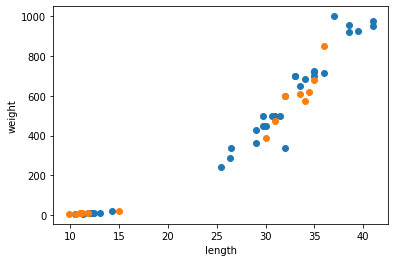

In [31]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1]) # train_input[:,0] == fish length / train_input[:,1] == fish weight
plt.scatter(test_input[:,0],test_input[:,1])

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

## 두 번째 머신러닝 프로그램
- 앞서 만든 훈련 세트와 테스트 세트로 k-NearestNeighbor 모델을 훈련시켜보도록 하자.

- fit() 메서드들 실행할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 모든 것을 잃어버린다 
 - 유지하고 싶은 경우 KNeighborsClassifier 클래스 객체를 새로 만들어야 함

In [32]:
kn = kn.fit(train_input, train_target)

In [33]:
kn.score(test_input, test_target)

1.0

> 100%의 정확도로 테스트 세트에 있는 모든 샘플을 맞췄다.
- predict() 메서드로 테스트 세트의 예측결과와 실제 타깃을 확인해보자


In [34]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [35]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])



---

---







## **2일차. 훈련 세트와 테스트 세트**
- 모델의 공정하고 정확한 평가를 위해서는 학습에 사용되지 않은 데이터를 이용하여 평가해야 한다
- 훈련 데이터 => 훈련 세트 + 테스트 세트
- 훈련 세트와 테스트 세트를 올바르게 나누기 위해 파이썬의 다차원 배열 라이브러리인 넘파이를 사용해보았다
- 넘파이는 파이썬의 리스트와 비슷하지만 고차원의 큰 배열을 효과적으로 다룰 수 있는 다양한 도구를 제공한다

## **<전체 소스코드>**

In [ ]:
'''## 훈련 세트와 테스트 세트'''
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

print(fish_data[4])
print(fish_data[0:5])
print(fish_data[:5])
print(fish_data[44:])

# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]

# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]

# 테스트 세트로 입력값 중 0부터 34번째 인덱스까지 사용
test_input = fish_data[35:]

# 테스트 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
test_target = fish_target[35:]

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)


'''## 넘파이'''
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

print(input_arr.shape) # 이 명령을 사용하면 (sample number, feature number) 출력 가능

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index)

print(input_arr[[1,3]])

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

# 시각화
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 두 번째 머신러닝 프로그램
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)
kn.predict(test_input)
test_target